## Step 1: Get the data from online

In [148]:
from pathlib import Path
from urllib.request import urlretrieve # retrieve a url to a location in disk
import pandas as pd
import tarfile


def load_data():
    dataset_path=Path('dataset_recreate/housing.taz')
    csv_path=Path('dataset_recreate/housing/housing.csv')
    if not dataset_path.is_file():
        Path('dataset_recreate').mkdir(parents=True, exist_ok=True)
        urlretrieve("https://github.com/ageron/data/raw/main/housing.tgz", dataset_path)
        with tarfile.open(dataset_path) as housing_tgz:
            housing_tgz.extractall(path='dataset_recreate')
    return pd.read_csv(csv_path)
    
    

housing=load_data()  
    

In [149]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Step 2: Quick Glance at the data

In [150]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


What we find out:
- 10 features, 20640 entries
- ocean_proximity is the only non-numerical value
- total_bedrooms has null values   

In [151]:
# Explore the object ocean_proximity
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Five different categories of the housing in terms of ocean_proximity

In [152]:
# Check other statistics
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Findings:
- median_income is divided by 1000
- median_house_value and house_median_age are capped
- total_rooms, total_bedrooms, population as well as households have long tails

In [153]:
# Create a method to save the firgures generated in the code
import matplotlib.pyplot as plt
image_dir_recreate=Path('images_recreate')
Path('images_recreate').mkdir(exist_ok=True, parents=True)

def save_figures(imageId, figure_expension='png'):
    path=image_dir_recreate/f'{imageId}.{figure_expension}'
    plt.savefig(path)

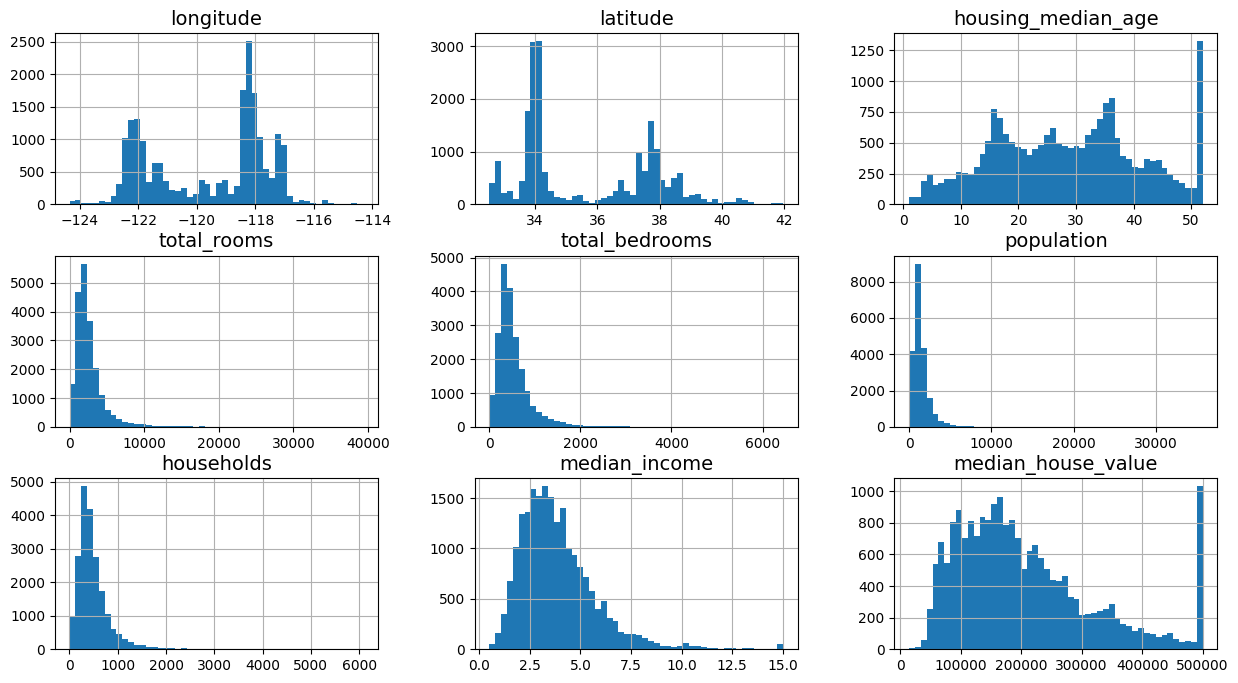

In [154]:
# Create a histogram to show the numerical values
import matplotlib.pyplot as plt
# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
housing.hist(bins=50, figsize=(15, 8))
save_figures("attribute_histogram_plots")
plt.show()


## Train / Test data split

There are multiple ways to split Data into Train data set and Test data set
1. 简单随机样本 (Simple random sample)
- Write a function to divide train and test data randomly but remeber to set the seed to make sure the same random data are always generated each time the program is running
- Using methods from sklearn
- If the data is updated then the above approach would not work, you need to hash the identifer of the test entries to make sure the train and test data will not be mixed after the data get updated.
 
2. 分层抽样 (Stratified sampling)
- Figure out how to make the strata
- Then split the data based on the strata category

In [155]:
# Simple random sample
import numpy as np
def shuffle_and_split(data, test_ratio=0.2):
    np.random.seed(42)
    randome_indices=np.random.permutation(len(data))
    test_data_size=int(len(data)*test_ratio)
    test_set_indices=randome_indices[0:test_data_size]
    train_set_indices=randome_indices[test_data_size:]
    test_data=data.iloc[test_set_indices]
    train_data=data.iloc[train_set_indices]
    return train_data, test_data
    

In [156]:
housing_train, housing_test=shuffle_and_split(housing, test_ratio=0.2)
housing_train.shape

(16512, 10)

In [157]:
housing_test.shape

(4128, 10)

In [158]:
# Use sklearn to achieve the above code
from sklearn.model_selection import train_test_split

train_data_randome, test_data_randome=train_test_split(housing, test_size=0.2, random_state=42)


In [159]:
train_data_randome.shape

(16512, 10)

In [160]:
test_data_randome.shape

(4128, 10)

In [161]:
## Using Hashing of identifiers to make no mix up between test and train data
from zlib import crc32
def is_in_test_set(id, test_ratio):
    return crc32(np.int64(id))<test_ratio*2**32



def train_test_split_using_hash(data, test_ratio, identifier_column):
    identifier=data[identifier_column]
    in_test_set=identifier.apply(lambda id : is_in_test_set(id, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]


In [162]:
housing_with_id = housing.reset_index()  # adds an `index` column
train_set, test_set = train_test_split_using_hash(housing_with_id, 0.2, "index")

In [163]:
train_set.head(5)

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


In [164]:
test_set.head(5)

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
16,16,-122.27,37.85,52.0,1966.0,347.0,793.0,331.0,2.7750,152500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY


In [165]:
# Other ways of hash, using stable features like longitude and latitude
housing['identifier']=housing['longitude']*1000+housing['latitude']
train_set, test_set=train_test_split_using_hash(housing, 0.2, 'identifier')


In [166]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15


In [167]:
train_set.shape

(16322, 11)

In [168]:
test_set.shape

(4318, 11)

However randome sample is not always accurate.
e.g. To find the probability that a random sample of 1,000 people contains less than 48.5% female or more than 53.5% female when the population's female ratio is 51.1%, we use the binomial distribution. The cdf() method of the binomial distribution gives us the probability that the number of females will be equal or less than the given value.


In [169]:
# extra code – shows how to compute the 10.7% proba of getting a bad sample
# 二项分布 (Binomial distribution)
# A binomial distribution can be thought of as simply the probability of a SUCCESS or FAILURE outcome in an experiment or survey that is repeated multiple times. The binomial is a type of distribution that has two possible outcomes (the prefix “bi” means two, or twice). For example, a coin toss has only two possible outcomes: heads or tails and taking a test could have two possible outcomes: pass or fail

from scipy.stats import binom

sample_size = 1000
ratio_female = 0.511
proba_too_small = binom(sample_size, ratio_female).cdf(485 - 1)
proba_too_large = 1 - binom(sample_size, ratio_female).cdf(535)
print(proba_too_small + proba_too_large)

0.10736798530929909


In [170]:
# Stratified sampling based on income category
housing['income_category']=pd.cut(housing['median_income'], bins=[0, 1.5, 3, 4.5, 6, np.inf], labels=[1,2,3,4,5])

train_set_stratified, test_set_stratified=train_test_split(housing, random_state=42, test_size=0.2, stratify=housing['income_category'])

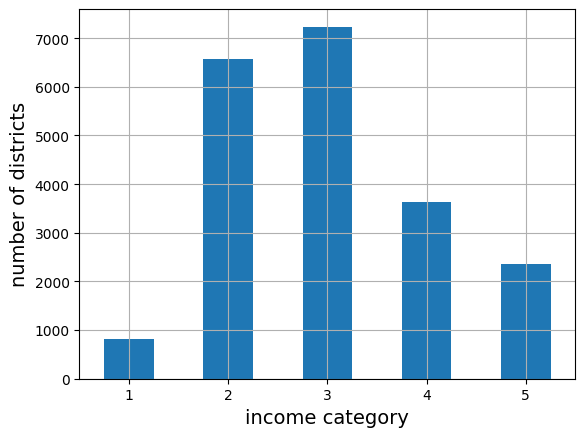

In [171]:
housing['income_category'].value_counts().sort_index().plot.bar(grid=True, rot=0)# rot meaning rotation
plt.xlabel('income category')
plt.ylabel('number of districts')
save_figures('housing_income_cat_bar_plot')
plt.show()

In [172]:
## Another way to do stratified sampling is using splitter this way you can have multiple splitters
from sklearn.model_selection import StratifiedShuffleSplit
splitter=StratifiedShuffleSplit(test_size=0.2,random_state=42, n_splits=10)
strat_splits=[]

for train_index, test_index in splitter.split(housing, housing['income_category']):
    train_set=housing.iloc[train_index]
    test_set=housing.iloc[test_index]
    strat_splits.append([train_set, test_set])
train_set, test_set=strat_splits[0]

In [173]:
train_set.shape

(16512, 12)

In [174]:
test_set.shape

(4128, 12)

In [175]:
# compare the difference between overall distribution, random sampling and stratified sampling
overall_distribution=housing['income_category'].value_counts()/len(housing)
overall_distribution


3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_category, dtype: float64

In [176]:
## Randome sampling
test_data_randome['income_category']=pd.cut(test_data_randome['median_income'], bins=[0,1.5,3,4.5,6,np.inf], labels=[1,2,3,4,5])
randome_sample_distribution=test_data_randome['income_category'].value_counts()/len(test_data_randome)
randome_sample_distribution

3    0.345203
2    0.307413
4    0.184109
5    0.120882
1    0.042393
Name: income_category, dtype: float64

In [177]:
stratified_sample_distribution=test_set_stratified['income_category'].value_counts()/len(test_set_stratified)
stratified_sample_distribution

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_category, dtype: float64

In [178]:
type(stratified_sample_distribution)

pandas.core.series.Series

In [179]:
## Make a Dataframe to visualize the difference
compare_props=pd.DataFrame({
    "Overall %": overall_distribution,
    "Stratified %": stratified_sample_distribution,
    "Random %": randome_sample_distribution,
}).sort_index()

compare_props.index.name='Income Category'


In [180]:
compare_props['Strat.Error']=(compare_props['Stratified %']-compare_props['Overall %'])/compare_props['Overall %']
compare_props['Rand. Error %']=(compare_props['Random %']-compare_props['Overall %'])/compare_props['Overall %']

In [181]:
compare_props=(compare_props*100).round(2)
compare_props

,Overall %,Stratified %,Random %,Strat.Error,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


In [182]:
## No need income_category column now so can be dropped

for set in (train_set_stratified, test_set_stratified):
    set.drop(['income_category', 'identifier'], axis=1, inplace=True)

In [183]:
train_set_stratified.shape

(16512, 10)

In [184]:
test_set_stratified.shape

(4128, 10)

In [185]:
test_set_stratified.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

## Discover and Visualize the data to gain insights

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

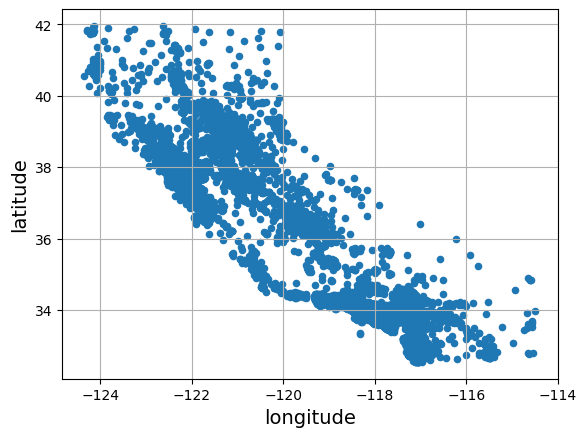

In [186]:
## Geography data
housing=train_set_stratified.copy()
housing.plot(kind='scatter', x='longitude',y="latitude", grid=True)


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

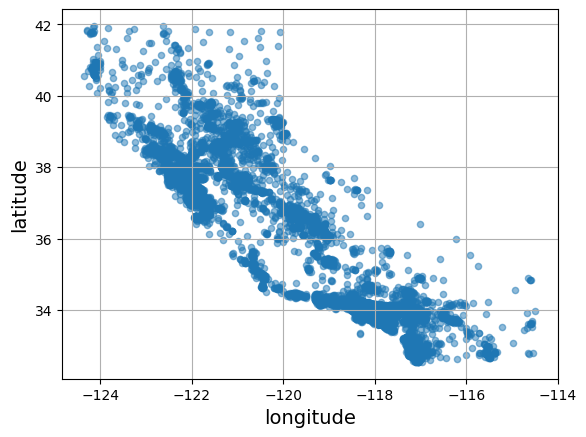

In [187]:
housing.plot(kind='scatter', x='longitude',y="latitude", grid=True, alpha=0.5)
# Alpha shows density of the data points

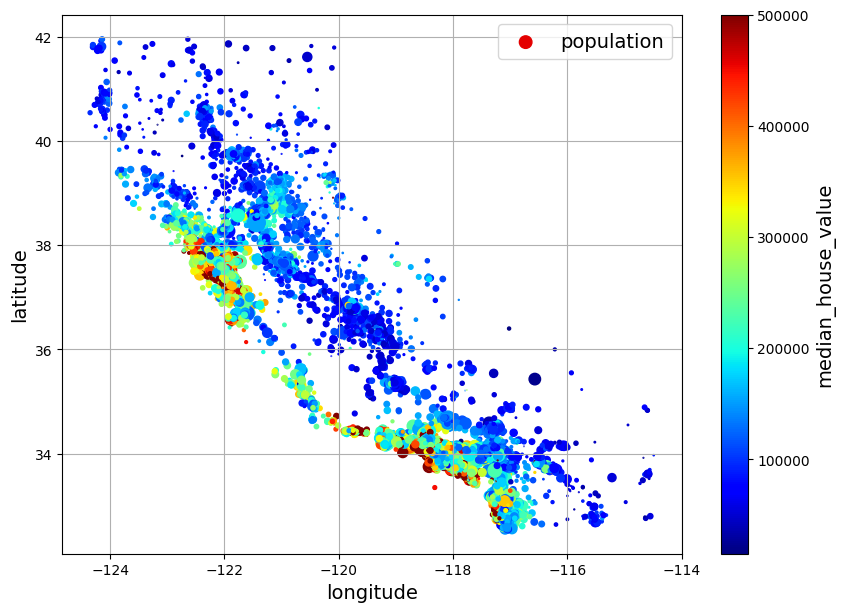

In [188]:
# shows population density and pricing
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, figsize=(10, 7))
save_figures("housing_prices_scatterplot")  # extra code
plt.show()

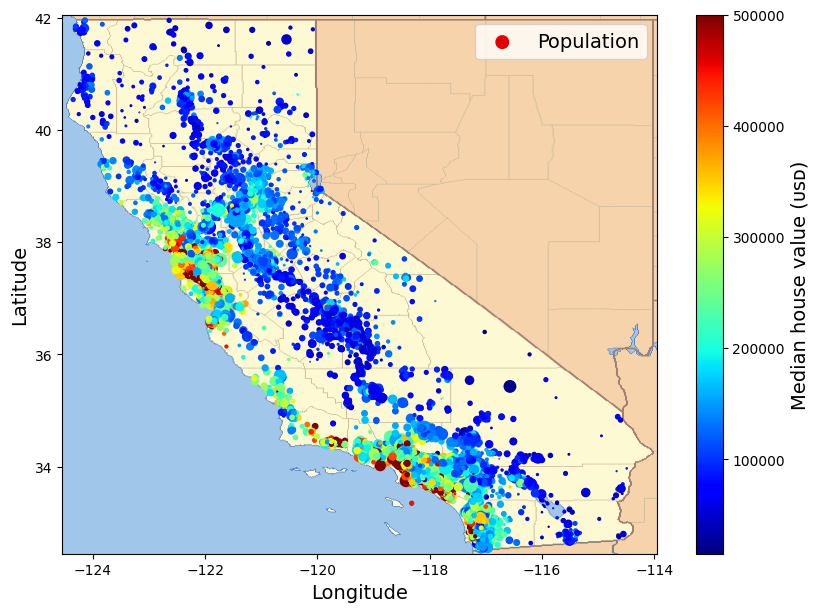

In [189]:
# extra code – this cell generates the first figure in the chapter

# Download the California image

filename = "california.png"
if not (image_dir_recreate / filename).is_file():
    homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
    url = homl3_root + "images/end_to_end_project/" + filename
    print("Downloading", filename)
    urlretrieve(url, image_dir_recreate / filename)

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed.plot(
             kind="scatter", x="Longitude", y="Latitude",
             s=housing_renamed["Population"] / 100, label="Population",
             c="Median house value (ᴜsᴅ)", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

california_img = plt.imread(image_dir_recreate / filename)
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)

In [190]:
## checking out correlations
corr_matrix=housing.corr()

In [191]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

Findings:
- median_income has the highest correlation

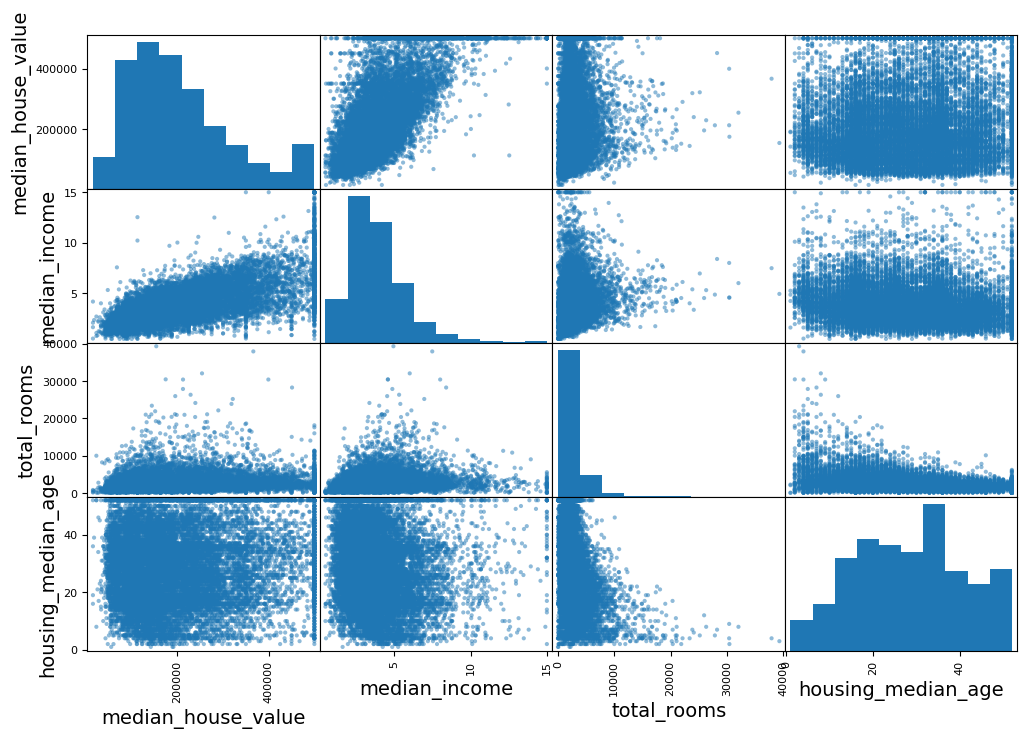

In [192]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

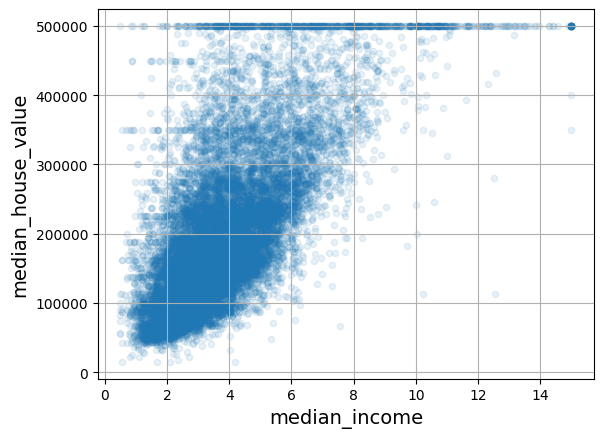

In [193]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
save_figures("income_vs_house_value_scatterplot")  # extra code
plt.show()

In [194]:
## explore other attributes
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]


In [195]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

## Clean the data
1. Dealing with Missing data
2. Dealing with categorical data
3. Feature scaling and transformation
4. Custom Transformations
5. Transformation pipelines


1. Dealing with missing data
- Get rid of the corresponding rows
- Get rid of the whole attributes
- Set the missing vlaues to some values (e.g 0, median, mean), this approach is called **imputation**

In [196]:
# Seperate the features from the lables
housing=train_set_stratified.drop('median_house_value', axis=1)
housing_labels=train_set_stratified['median_house_value'].copy()
#Revert to the original training set and separate the target (note that strat_train_set.drop() creates a copy of strat_train_set without the column, 
# it doesn't actually modify strat_train_set itself, unless you pass inplace=True):

In [197]:
# get rid of the corresponding rows
housing.dropna(subset=['total_bedrooms'])#subset:	Optional, specifies where to look for NULL values

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,<1H OCEAN
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,INLAND
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,NEAR OCEAN
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,<1H OCEAN


In [198]:
# Drop the whole column
housing.drop('total_bedrooms', axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1576.0,1034.0,2.0987,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,666.0,357.0,6.0876,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,562.0,203.0,2.4330,INLAND
14689,-117.11,33.75,17.0,4174.0,1845.0,780.0,2.2618,INLAND
20507,-118.15,33.77,36.0,4366.0,1912.0,1172.0,3.5292,NEAR OCEAN
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,938.0,523.0,4.7105,<1H OCEAN
13105,-119.31,36.32,23.0,2945.0,1419.0,532.0,2.5733,INLAND
19301,-117.06,32.59,13.0,3920.0,2814.0,760.0,4.0616,NEAR OCEAN
19121,-118.40,34.06,37.0,3781.0,1725.0,838.0,4.1455,<1H OCEAN


In [199]:
# filling NA value with other values like median
housing['total_bedrooms'].fillna(value=housing['total_bedrooms'].median())
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,<1H OCEAN
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,INLAND
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,NEAR OCEAN
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,<1H OCEAN


Using imputation functionality from sklearn to replace the third approach
It has the following benefit: 

The SK Learn imputation functionality store the median value of each feature which will make it possible to impute missing values not only in Training set but also on the validation set, test set and any **NEW** data fed to the model


In [200]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
# SimpleImputer only works for non-numerical data
housing_num=housing.select_dtypes(include=[np.number])
imputer.fit(housing_num)
X=imputer.transform(housing_num) # X is a numpy array so must be reconstructured to a df
type(X)

numpy.ndarray

In [201]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [202]:
imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [203]:
imputer.strategy

'median'

In [204]:
housing_num.median()

longitude             -118.5100
latitude                34.2600
housing_median_age      29.0000
total_rooms           2125.0000
total_bedrooms         434.0000
population            1167.0000
households             408.0000
median_income            3.5385
dtype: float64

In [205]:
housing_filled=pd.DataFrame(X, index=housing_num.index, columns=housing_num.columns)
housing_filled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


2. Dealing with categorical data

Most machine learning algorithms prefer to work with numbers so we need to convert these categorical data from text to numbers.

- OrdinalEncoder
- OneHotEncoder



In [206]:
housing_cat=housing[['ocean_proximity']] # why [[]], because fit_transform is exoecting a 2d array

In [207]:
from sklearn.preprocessing import OrdinalEncoder
ordinalEncoder=OrdinalEncoder()
housing_cat_encoded=ordinalEncoder.fit_transform(housing_cat)
housing_cat_encoded[0:5]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.]])

In [208]:
ordinalEncoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

However, disadvantage of using ordinalencoder here is that the order between each category is not so obvious, instead, using one-hot encoding

In [209]:
from sklearn.preprocessing import OneHotEncoder
onehotEncoder=OneHotEncoder()
housing_cat_onehot_encoded=onehotEncoder.fit_transform(housing_cat)
housing_cat_onehot_encoded[0:5]

<5x5 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

By default, the output of a OneHotEncoder is a Scipy sparse matrix, instead of NumPy array.
Sparse matrices are memory efficient data structures that enable us store large matrices with very few non-zero elements aka sparse matrices.

In [210]:
# convert sparse matrix to a numpy array or just set sparse=False when doing the transformation
housing_cat_onehot_encoded.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [211]:
onehotEncoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [212]:
onehotEncoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [213]:
onehotEncoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [214]:
## construct a DF using the above info
df_output=pd.DataFrame(housing_cat_onehot_encoded.toarray(), columns=onehotEncoder.get_feature_names_out(), index=housing_cat.index)
df_output

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
13096,0.0,0.0,0.0,1.0,0.0
14973,1.0,0.0,0.0,0.0,0.0
3785,0.0,1.0,0.0,0.0,0.0
14689,0.0,1.0,0.0,0.0,0.0
20507,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
14207,1.0,0.0,0.0,0.0,0.0
13105,0.0,1.0,0.0,0.0,0.0
19301,0.0,0.0,0.0,0.0,1.0
19121,1.0,0.0,0.0,0.0,0.0


3. Feature scaling and transformation
- Normalization (Min-Max scaling ranging from 0 to 1)
- Standardization (using it when there are more outliers)
- If the data has a heavy tail, need to first transform the data to shrink the heavy tail and make the distribution more symmetrical
    - replace the feature with its square root
    - or raise the feature with its logorithm, close to a gaussian distribution (bell-shaped)
    ![](./pics/GaussianDistribution.jpg)
    - or bucketizing the feature: meaning chopping its distribution into roughly qual-sized buckets and replacing each feature value with the index of the bucket it belongs to, much like we did for income_category. Bucketizing with queal-sized buckets results in a feature with an almost uniformed distrubution so there is no need for further scaling or you can just divide by the number of the buckets to force the values to the 0-1 range.
- If the feature has multiple mode (with more than 2 clear peaks) such as housing_median_age
    - Using bucketizing helps by treating the bucketID as the categories rather than numerical values and using onehotencoding to code the category.
    - Or adding a feature for each of the modes (at least the main ones), represeting the similarity between the housing median age and the particular mode. This similarity is typically computed using **Radial Basis Function(RBF)** any function that dependes only on the distrance between the input and a fixed point. Most used RBF is the Gaussian RBF whoes output valu decays exponentially as the input value moves away from the fixed point.

- If the target values are scaled, you will have to scale them back after the prediction : `inverse_transform()`. we convert the labels from a pandas series to a Dataframe, since the StandardScaler expects a 2D inputs.

In [215]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler(feature_range=(-1,1))
housing_min_max_scaled=min_max_scaler.fit(housing_filled)

In [216]:
from sklearn.preprocessing import StandardScaler
standardScaler= StandardScaler()
housing_standarized_scaled=standardScaler.fit(housing_filled)

In [217]:
from sklearn.metrics.pairwise import rbf_kernel
age_simil_35=rbf_kernel(housing[['housing_median_age']],[[35]], gamma=0.1)
age_simil_35

array([[2.81118530e-13],
       [8.20849986e-02],
       [6.70320046e-01],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]])

In [218]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
target_scaler=StandardScaler()
target_scaled=target_scaler.fit_transform(housing_labels.to_frame())
model.fit(housing[['median_income']], target_scaled)
# pretend this is the new data
some_new_data=housing[['median_income']].iloc[:5]
scaled_predictions=model.predict(some_new_data)
target_scaler.inverse_transform(scaled_predictions)

array([[131997.15275877],
       [299359.35844434],
       [146023.37185694],
       [138840.33653057],
       [192016.61557639]])

In [220]:
# simpler code: using a TransformedTargetRegressor

from sklearn.compose import TransformedTargetRegressor
model=TransformedTargetRegressor(LinearRegression(), transformer=StandardScaler())
model.fit(housing[['median_income']], housing_labels)
model.predict(some_new_data)

array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])

4. Custom Transformers
- Although Sckkit Learn provides many useful transformers, you will need to write your own for tasks such as custom transformations, cleanup operations or combining attributes.
- For transformations that do not require any traning, you can just write a function that takes a numpy array as input and outputs the transformed array.





In [221]:
from sklearn.preprocessing import FunctionTransformer
log_transformer=FunctionTransformer(func=np.log, inverse_func=np.exp)
log_population=log_transformer.transform(housing[['population']])

In [222]:
## Using Function Transformer to rewrite rbf_kernel function
rbf_transformer=FunctionTransformer(rbf_kernel, kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35=rbf_transformer.transform(housing[['housing_median_age']])

In [228]:
# or computation
ratio_transformer=FunctionTransformer(lambda X: X[:,[0]]/X[:, [1]])
ratio_transformer.transform(np.array([[1.,2.],[3.,4.]]))


array([[0.5 ],
       [0.75]])

5. Transformation pipelines

There are many data transformation steps that need to be executed in the right order.
- Scikit leanring provides the pipeline class to help with such sequences of transformations
- The pipeline constructors takes a list of names/estimator pairs(2-tuples) during a sequence of steps. The names can be anything you like as long as they are unique and have no double underscores. The name is optional.
- The estimators must all be transformers(they must all have fit_transform() method), except for the latone, which can be anything: a transformer, a predictor or any other type of estimator.
- When you call the pipeline's fit() method, it calls fit_transform() sequentially on all the transformers, passing the output of each call as the parameter to the next call until it reaches the final estimator for which it just calls the fit() method


In [235]:
import sklearn
sklearn.set_config(display='diagram') # Make all the scikit estimators as interative diagrams. This is particularly useful for visualizing pipelines


In [236]:
# The numerical attributes, which will first impute then scale the input features
from sklearn.pipeline import Pipeline
num_pipeline=Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('standardize', StandardScaler())
])

In [237]:
num_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

In [239]:
# do not have name
from sklearn.pipeline import make_pipeline
num_pipeline=make_pipeline(
    SimpleImputer(strategy='median'), StandardScaler()
)

In [241]:
num_pipeline.named_steps

{'simpleimputer': SimpleImputer(strategy='median'),
 'standardscaler': StandardScaler()}

In [242]:
num_pipeline['simpleimputer']

SimpleImputer(strategy='median')

In [243]:
cat_pipeline=make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore'))

In [244]:
# Use ColumnTransformer to transform all attributes (disadvantage: have to name all the columns)
num_attrubutes=['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
cat_attributes=['ocean_proximity']
from sklearn.compose import ColumnTransformer
preprocessing=ColumnTransformer([
('num', num_pipeline, num_attrubutes),
('cat', cat_pipeline, cat_attributes)])

In [247]:
# if you perfer not to name each attibutes
from sklearn.compose import make_column_selector, make_column_transformer
preprocessing=make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object))
    )

In [248]:
housing_prepared=preprocessing.fit_transform(housing)

(16512, 13)